In [1]:
## Load data
import glob
import pandas as pd
import pickle

group = 'gender'
# group = 'age'
df = pd.read_csv(r'/home/hbt/jchr_data/jchr_racial_diff/results/preprocessed_data/1_2_model_input_ws60min_ph60min_v6.csv')




# Define the path to your folder
folder_path = rf'/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/2_1_1_predicted_results_rnn_v6_{group}'

# Pattern to match the files
file_pattern = f'{folder_path}/patient*_ratio*.pkl'

# Dictionary to store the data
dictionary = {}

# Iterate over files matched by glob
for file_path in glob.glob(file_pattern):
    with open(file_path, 'rb') as file:
        # Extracting N and X from the filename
        filename = file_path.split('/')[-1]  # Adjust if necessary based on your OS
        patient_id, ratio_id = filename.replace('.pkl', '').split('_')
        # Extracting numeric parts from patient_id and ratio_id
        patient_num = ''.join(filter(str.isdigit, patient_id))
        ratio_num = ''.join(filter(str.isdigit, ratio_id))
        
        # Load the content of the file
        file_data = pickle.load(file)

        # Store the data
        dictionary.update(file_data)

# Now loaded_data contains all your files' data
outer_keys = dictionary.keys()
print("Outer keys:", list(outer_keys))
inner_keys = dictionary[(172, 100)].keys()
print("Inner keys:", list(inner_keys))

Outer keys: [(7, 90), (83, 50), (5, 10), (120, 50), (21, 80), (230, 0), (163, 70), (60, 20), (106, 40), (46, 30), (8, 90), (230, 100), (17, 0), (213, 40), (49, 30), (94, 0), (97, 80), (196, 50), (134, 80), (35, 50), (226, 0), (175, 20), (76, 70), (110, 10), (13, 40), (112, 90), (72, 0), (208, 90), (153, 30), (50, 60), (199, 50), (98, 80), (221, 80), (79, 70), (54, 100), (205, 10), (207, 90), (82, 0), (48, 0), (214, 70), (157, 100), (128, 60), (188, 30), (232, 60), (68, 10), (101, 70), (43, 80), (142, 50), (24, 30), (127, 60), (187, 30), (84, 60), (67, 10), (164, 40), (65, 90), (188, 100), (202, 20), (118, 20), (104, 100), (159, 80), (58, 50), (14, 70), (57, 50), (156, 80), (32, 60), (131, 30), (191, 60), (92, 30), (71, 40), (172, 10), (75, 90), (174, 40), (189, 100), (137, 60), (34, 30), (94, 60), (197, 30), (152, 50), (53, 80), (111, 70), (12, 20), (78, 10), (138, 60), (222, 60), (198, 30), (156, 100), (162, 10), (61, 40), (160, 90), (121, 30), (22, 60), (82, 30), (4, 70), (181, 60), 

### Extract one PtID with one ratio from dictionary

In [2]:
import numpy as np

path_seg_csv = "/home/hbt/miniforge3/envs/env_study1_v3/lib/python3.11/site-packages/methcomp/static/seg.csv"

data = np.loadtxt(path_seg_csv)

y_actual = dictionary[(4,20)]['y_actual']
y_pred = dictionary[(4, 20)]['y_pred']

n = 18

ref = y_actual * n
pred = y_pred * n
pred = np.clip(pred, None, 599)
print(
    np.shape(ref),
    np.shape(pred),
    print(y_actual.max())
)
# from . import static  # temporary fix


i = 0
for p, r in zip(pred, ref):
    print(i ,int(p), int(r))
    print(i, data.T[int(p), int(r)])
    print("---")
    i += 1


print("Number of values above 600:",np.sum(pred > 600))    
#data = np.loadtxt(pkg_resources.open_text(static, "seg.csv"))
# _zones = np.array([data.T[int(p), int(t)] for p, t in zip(pred, ref)])

_zones = np.array(data.T[int(p), int(t)] for p, t in zip(pred, ref))

#print(int(y_pred))


# print(_zones)

27.65486725663717
(672, 1) (672, 1) None
0 295 362
0 0.40712
---
1 351 365
1 0.02799
---
2 317 386
2 0.17812
---
3 381 403
3 0.28499
---
4 347 417
4 0.46056
---
5 357 418
5 0.31298
---
6 418 399
6 0.31552
---
7 396 371
7 0.0076336
---
8 419 347
8 0.52672
---
9 391 324
9 0.21883
---
10 336 295
10 0.29771
---
11 298 267
11 0.063613
---
12 286 246
12 0.30789
---
13 263 231
13 0.28499
---
14 224 222
14 0.0
---
15 206 210
15 0.0
---
16 198 197
16 0.0
---
17 195 186
17 0.0076336
---
18 197 177
18 0.48092
---
19 181 184
19 0.0
---
20 170 231
20 0.64631
---
21 165 300
21 0.89822
---
22 159 355
22 1.2621
---
23 199 358
23 0.84987
---
24 305 337
24 0.0025445
---
25 355 330
25 0.1883
---
26 399 327
26 0.21883
---
27 314 322
27 0.0
---
28 293 325
28 0.22901
---
29 317 327
29 0.0
---
30 303 313
30 0.0
---
31 298 313
31 0.22901
---
32 322 312
32 0.0
---
33 311 295
33 0.29008
---
34 271 313
34 0.23919
---
35 312 366
35 0.17812
---
36 287 471
36 0.75064
---
37 248 497
37 0.96183
---
38 352 497
38 0.36

/tmp/ipykernel_3882259/991320426.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(i ,int(p), int(r))
/tmp/ipykernel_3882259/991320426.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(i, data.T[int(p), int(r)])


In [3]:
ref.dtype

dtype('float64')

In [4]:
[data.T[int(p), int(t)] for p, t in zip(pred, ref)]

/tmp/ipykernel_3882259/352313238.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [data.T[int(p), int(t)] for p, t in zip(pred, ref)]


[0.40712,
 0.02799,
 0.17812,
 0.28499,
 0.46056,
 0.31298,
 0.31552,
 0.0076336,
 0.52672,
 0.21883,
 0.29771,
 0.063613,
 0.30789,
 0.28499,
 0.0,
 0.0,
 0.0,
 0.0076336,
 0.48092,
 0.0,
 0.64631,
 0.89822,
 1.2621,
 0.84987,
 0.0025445,
 0.1883,
 0.21883,
 0.0,
 0.22901,
 0.0,
 0.0,
 0.22901,
 0.0,
 0.29008,
 0.23919,
 0.17812,
 0.75064,
 0.96183,
 0.36641,
 0.11959,
 0.053435,
 0.053435,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.050891,
 0.36641,
 0.37405,
 0.0,
 0.23664,
 0.15013,
 0.23155,
 0.23919,
 0.29771,
 0.49109,
 0.31043,
 0.38931,
 0.84733,
 1.2392,
 1.4402,
 0.5827,
 0.55216,
 0.21628,
 0.0,
 0.71501,
 1.3817,
 1.4504,
 1.4555,
 1.0127,
 0.53181,
 1.0992,
 0.53181,
 0.33333,
 0.6972,
 0.0,
 0.53181,
 0.4402,
 0.025445,
 0.17812,
 0.35369,
 0.32061,
 0.21883,
 0.14758,
 0.31298,
 0.16539,
 0.74809,
 1.1196,
 0.71756,
 0.24682,
 0.23919,
 0.50891,
 0.43511,
 0.38931,
 0.40712,
 0.17557,
 0.18066,
 0.2112,
 0.51399,
 0.35369,
 0.28499,
 0.33842,
 0.34351,
 0.44529,
 0.010178,
 0.137

In [5]:
np.shape(data)

(600, 600)

SEG scores: [0.40712   0.17557   0.17812   0.28499   0.31298   0.31298   0.31552
 0.32316   0.52672   0.21883   0.29771   0.35369   0.31043   0.28499
 0.        0.        0.        0.0076336 0.48092   0.39949   0.64631
 0.89822   1.2621    0.84987   0.23155   0.1883    0.2112    0.
 0.22901   0.        0.22901   0.22901   0.        0.29008   0.23919
 0.17812   0.75064   0.96183   0.51399   0.11705   0.053435  0.
 0.        0.        0.        0.        0.        0.050891  0.36641
 0.37405   0.        0.23664   0.15013   0.23664   0.23919   0.29771
 0.31043   0.31552   0.38931   0.84733   1.2392    1.4402    0.79898
 0.55216   0.21628   0.        0.71501   1.3817    1.4198    1.4555
 1.0992    1.0025    1.0992    0.40204   0.33333   0.6972    0.058524
 0.53181   0.4402    0.3715    0.17557   0.21374   0.32061   0.21883
 0.0025445 0.31298   0.16539   0.74809   1.2265    0.88804   0.61323
 0.23919   0.50891   0.47328   0.38931   0.40712   0.17557   0.18066
 0.2112    0.51399   0.35369   0

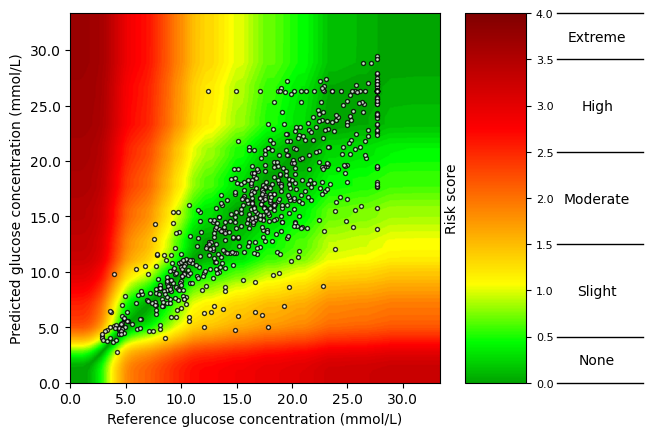

In [6]:
y_actual = dictionary[(4, 0)]['y_actual']
y_pred = dictionary[(4, 0)]['y_pred']

from random import uniform

import matplotlib.pyplot as plt

from methcomp import seg, segscores

zones = segscores(y_actual, y_pred, units="mmol")
print("SEG scores: {}".format(zones))

seg(y_actual, y_pred, units="mmol", percentage=False)
plt.show()

In [7]:
import my_utils
import numpy as np
iteration = 1
dict_results = {}

for (PtID, percentage), value in dictionary.items():
    

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    print('patient ID: ',PtID, 'ratio: ', percentage)
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
    

    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
     
    dict_results[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    
    }


patient ID:  7 ratio:  90


patient ID:  83 ratio:  50
patient ID:  5 ratio:  10
patient ID:  120 ratio:  50
patient ID:  21 ratio:  80
patient ID:  230 ratio:  0
patient ID:  163 ratio:  70
patient ID:  60 ratio:  20
patient ID:  106 ratio:  40
patient ID:  46 ratio:  30
patient ID:  8 ratio:  90
patient ID:  230 ratio:  100
patient ID:  17 ratio:  0
patient ID:  213 ratio:  40
patient ID:  49 ratio:  30
patient ID:  94 ratio:  0
patient ID:  97 ratio:  80
patient ID:  196 ratio:  50
patient ID:  134 ratio:  80
patient ID:  35 ratio:  50
patient ID:  226 ratio:  0
patient ID:  175 ratio:  20
patient ID:  76 ratio:  70
patient ID:  110 ratio:  10
patient ID:  13 ratio:  40
patient ID:  112 ratio:  90
patient ID:  72 ratio:  0
patient ID:  208 ratio:  90
patient ID:  153 ratio:  30
patient ID:  50 ratio:  60
patient ID:  199 ratio:  50
patient ID:  98 ratio:  80
patient ID:  221 ratio:  80
patient ID:  79 ratio:  70
patient ID:  54 ratio:  100
patient ID:  205 ratio:  10
patient ID:  207 ratio:  90
patient ID:  82

In [ ]:
y_pred_base3 =np.clip(y_pred_base, None, 599)
y_pred_base3*18

array([[103.99949 ],
       [114.86646 ],
       [104.54686 ],
       [ 83.55886 ],
       [ 79.78705 ],
       [ 82.76103 ],
       [ 77.44231 ],
       [ 81.74789 ],
       [130.63374 ],
       [110.268456],
       [ 91.630226],
       [117.62091 ],
       [114.012474],
       [ 79.293   ],
       [ 86.52659 ],
       [102.81948 ],
       [ 93.9503  ],
       [ 97.313255],
       [135.33485 ],
       [124.5995  ],
       [141.64453 ],
       [146.33768 ],
       [133.70364 ],
       [115.31468 ],
       [110.33364 ],
       [117.302505],
       [114.54143 ],
       [119.57446 ],
       [139.64285 ],
       [181.64859 ],
       [246.38754 ],
       [215.56729 ],
       [188.75606 ],
       [206.91447 ],
       [235.34198 ],
       [234.9255  ],
       [227.00978 ],
       [258.02216 ],
       [235.14421 ],
       [226.10257 ],
       [220.51967 ],
       [196.00078 ],
       [184.60011 ],
       [164.69113 ],
       [176.92726 ],
       [180.86801 ],
       [188.04831 ],
       [181.5

In [ ]:
file_path = f"/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.pkl"
        
        
with open(file_path, 'wb') as file:
# Serialize and save the list to the file
    pickle.dump(dict_results, file)
        

In [ ]:
    
import my_utils
import numpy as np
iteration = 1
dict_zones = {}
dict_counts = {}
def replace_values_in_intervals(arr, intervals):
    """
    Replace values within specified intervals in a NumPy array.
    
    Parameters:
    - arr (numpy.ndarray): The array to modify.
    - intervals (list of tuples): Each tuple contains three elements (lower_bound, upper_bound, new_value).
    
    Returns:
    - numpy.ndarray: The modified array with replaced values.
    """
    # Ensure the array is a numpy array
    arr = np.array(arr)
    
    for lower, upper, new_value in intervals:
        arr[(arr >= lower) & (arr < upper)] = new_value
        
    return arr

def count_values(arr, values):
    """
    Count occurrences of specific values in a NumPy array.

    Parameters:
    - arr (numpy.ndarray): The array to inspect.
    - values (list): A list of values to count in the array.

    Returns:
    - Multiple integer counts corresponding to each value in the 'values' list.
    """
    counts = [np.count_nonzero(arr == value) for value in values]
    return tuple(counts)  # Return counts as a tuple

intervals = [(0.0, 0.5, 0),(0.5, 1.5, 1), (1.5, 2.5, 2), (2.5, 3.5, 3), (3.5, 4, 4)]
values_to_count = [0, 1, 2, 3, 4]

for (PtID, percentage), value in dictionary.items():
    
    if PtID == 4:
        continue

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    print('patient ID: ',PtID, 'ratio: ', percentage)
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
        
        
    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
    
    
    zones_modified_base = replace_values_in_intervals(zones_base, intervals)
    zones_modified_naive = replace_values_in_intervals(zones_naive, intervals)
    zones_modified_single = replace_values_in_intervals(zones_single, intervals)
    zones_modified_tl = replace_values_in_intervals(zones_tl, intervals)
    
    counts_none_base, counts_slight_base, counts_moderate_base, counts_high_base, counts_extreme_base = count_values(zones_modified_base, values_to_count)
    counts_none_naive, counts_slight_naive, counts_moderate_naive, counts_high_naive, counts_extreme_naive = count_values(zones_modified_naive, values_to_count)
    counts_none_single, counts_slight_single, counts_moderate_single, counts_high_single, counts_extreme_single = count_values(zones_modified_single, values_to_count) 
    counts_none_tl, counts_slight_tl, counts_moderate_tl, counts_high_tl, counts_extreme_tl = count_values(zones_modified_tl, values_to_count)
    
    dict_zones[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    }    
    dict_counts[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "counts_none_naive": counts_none_naive,
        "counts_slight_naive": counts_slight_naive,
        "counts_moderate_naive": counts_moderate_naive,
        "counts_high_naive": counts_high_naive,
        "counts_extreme_naive": counts_extreme_naive,
        "counts_none_single": counts_none_single,
        "counts_slight_single": counts_slight_single,
        "counts_moderate_single": counts_moderate_single,
        "counts_high_single": counts_high_single,
        "counts_extreme_single": counts_extreme_single,
        "counts_none_base": counts_none_base,
        "counts_slight_base": counts_slight_base,
        "counts_moderate_base": counts_moderate_base,
        "counts_high_base": counts_high_base,
        "counts_extreme_base": counts_extreme_base,
        "counts_none_tl": counts_none_tl,
        "counts_slight_tl": counts_slight_tl,
        "counts_moderate_tl": counts_moderate_tl,
        "counts_high_tl": counts_high_tl,
        "counts_extreme_tl": counts_extreme_tl
         
         
    
    }

In [ ]:
import pandas as pd
df_counts = pd.DataFrame.from_dict(dict_counts, orient='index').reset_index()
df_counts = df_counts.rename(columns={'level_0': 'PtID', 'level_1': 'ratio'})
df_counts

# file_path_save = '/Users/au605715/Documents/GitHub/study1/df_counts_age.csv'
# df_counts.to_csv(file_path_save)